In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

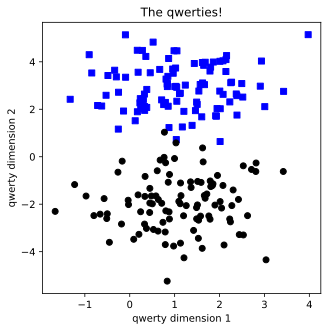

In [2]:
# create data

nPerClust = 100
blur = 1

A = [  1, 3 ]
B = [  1, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [15]:
# create the classification model

def createModel(learningRate):
    ANNclassify = nn.Sequential(
        nn.Linear(2, 16), # input layer
       # nn.ReLU(), # activation unit
        nn.Linear(16, 1), # hidden layer
       # nn.ReLU(), # activation unit
        nn.Linear(1, 1), # output unit
        nn.Sigmoid(), # final activation unit
    )
    
    # define the loss function
    lossfun = nn.BCELoss()
    
    # choose the optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningRate)
    
    return ANNclassify, lossfun, optimizer

In [16]:
# train the model

numepochs = 1000

def trainModel(ANNmodel):
    losses = torch.zeros(numepochs)
    for epoch in range(numepochs):
        
        # forward pass
        yHat = ANNmodel(data)
        
        # calculate loss
        loss = lossfun(yHat, labels)
        losses[epoch] = loss
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    predictions = ANNmodel(data)
    totalacc = 100*torch.mean(((predictions>0.5) == labels).float())
    return losses, predictions, totalacc

Final accuracy: 99.5%


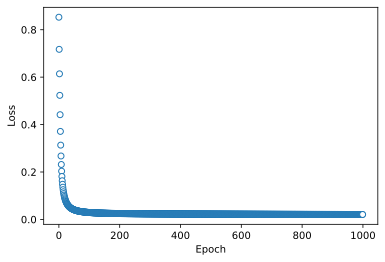

In [17]:
ANNmodel, lossfun, optimizer = createModel(0.1)
losses, predictions, totalacc = trainModel(ANNmodel)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

In [18]:
# learning rate
learningRates = np.linspace(0.001, 0.1, 50)

accByLR = []
allLosses = np.zeros((len(learningRates), numepochs))

for i, lr in enumerate(learningRates):
    ANNclassify, lossfun, optimizer = createModel(lr)
    losses, predictions, totalacc = trainModel(ANNclassify)
    # store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()

    

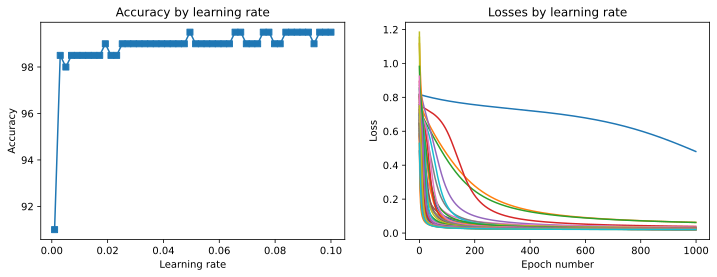

In [19]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningRates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

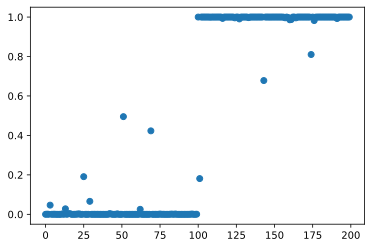

In [21]:
plt.plot(predictions.detach(), 'o');

In [20]:
# proportion of runs where the model has at least 70% accuracy
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(1.)